In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [ ]:
df = pd.read_csv('/content/loan_data_2007_2014.csv')
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
df = df.drop(columns=['Unnamed: 0','annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m',
                      'open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util',
                      'open_rv_12m','open_rv_24m','open_rv_24m','max_bal_bc',
                      'all_util','inq_fi','total_cu_tl','inq_last_12m'])
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


# Eksploratory Data Analysis

In [ ]:
nums = [    'id',    'member_id',    'loan_amnt',    'funded_amnt',    'funded_amnt_inv',    'int_rate',    'installment',    'annual_inc',    'dti',    'delinq_2yrs',    'inq_last_6mths',
        'mths_since_last_delinq',    'mths_since_last_record',    'open_acc',    'pub_rec',    'revol_bal',    'revol_util',    'total_acc',    'out_prncp',    'out_prncp_inv',    'total_pymnt',
            'total_pymnt_inv',    'total_rec_prncp',    'total_rec_int',    'total_rec_late_fee',    'recoveries',    'collection_recovery_fee',    'last_pymnt_amnt',    'collections_12_mths_ex_med',
            'mths_since_last_major_derog',    'policy_code',    'acc_now_delinq',    'tot_coll_amt',    'tot_cur_bal',    'total_rev_hi_lim',]


cats = ['term', 'grade',    'sub_grade',    'emp_title',    'emp_length',    'home_ownership',    'verification_status',
        'loan_status',    'pymnt_plan',   'purpose',    'title',    'zip_code',    'addr_state',    'desc',   'url',
        'initial_list_status',    'application_type']


times = ['issue_d',   'earliest_cr_line',   'last_pymnt_d',   'next_pymnt_d',   'last_credit_pull_d']

df[nums].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,...,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,...,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,...,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,...,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,...,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,...,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,...,33520.270000,7002.190000,36234.440000,20.000000,188.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


## Numerical Plot

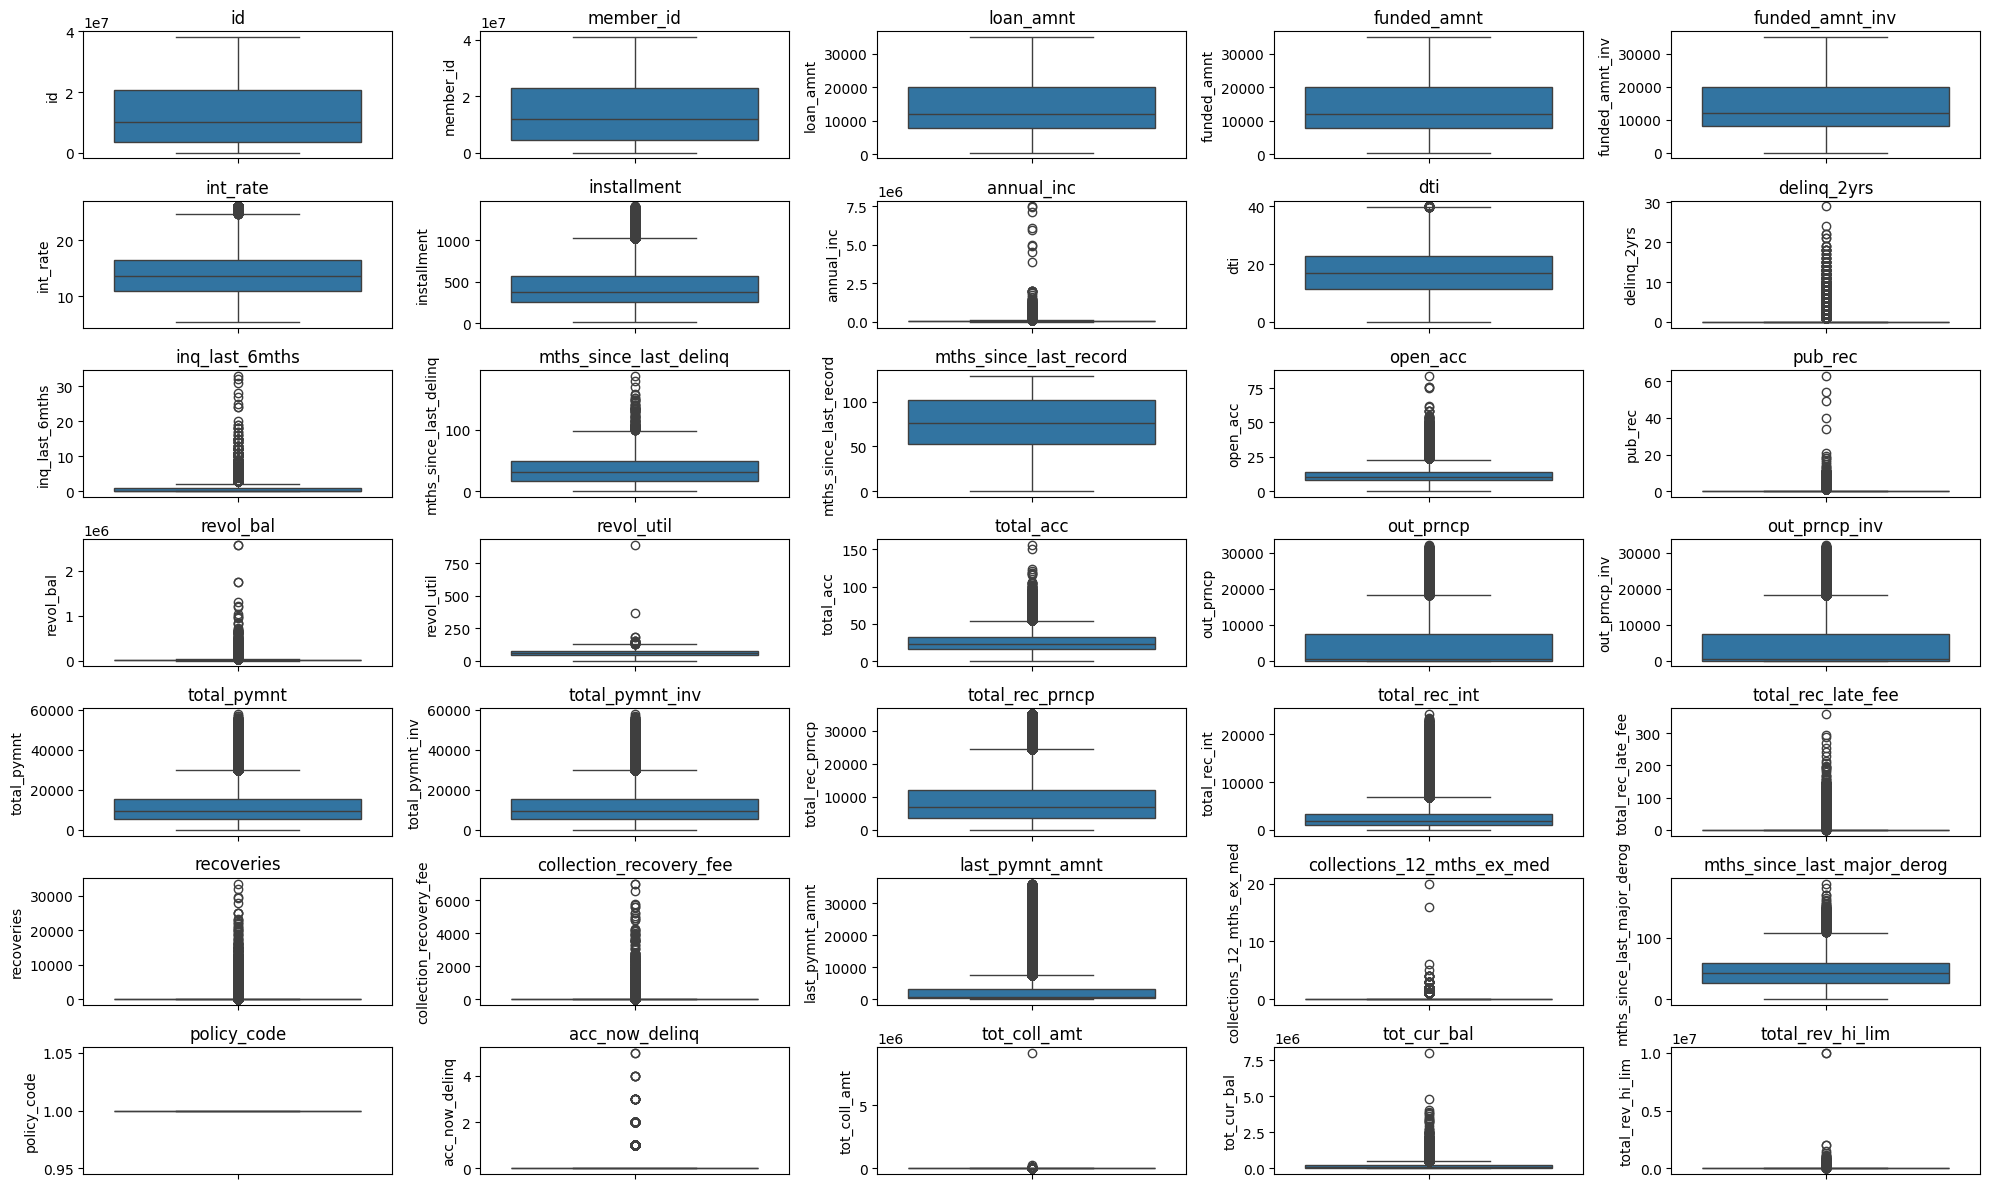

In [ ]:
plt.figure(figsize=(20,12))

for i in range(len(nums)):
    plt.subplot(7,5, i+1)
    sns.boxplot(y=df[nums[i]])
    plt.title(nums[i])

plt.tight_layout()

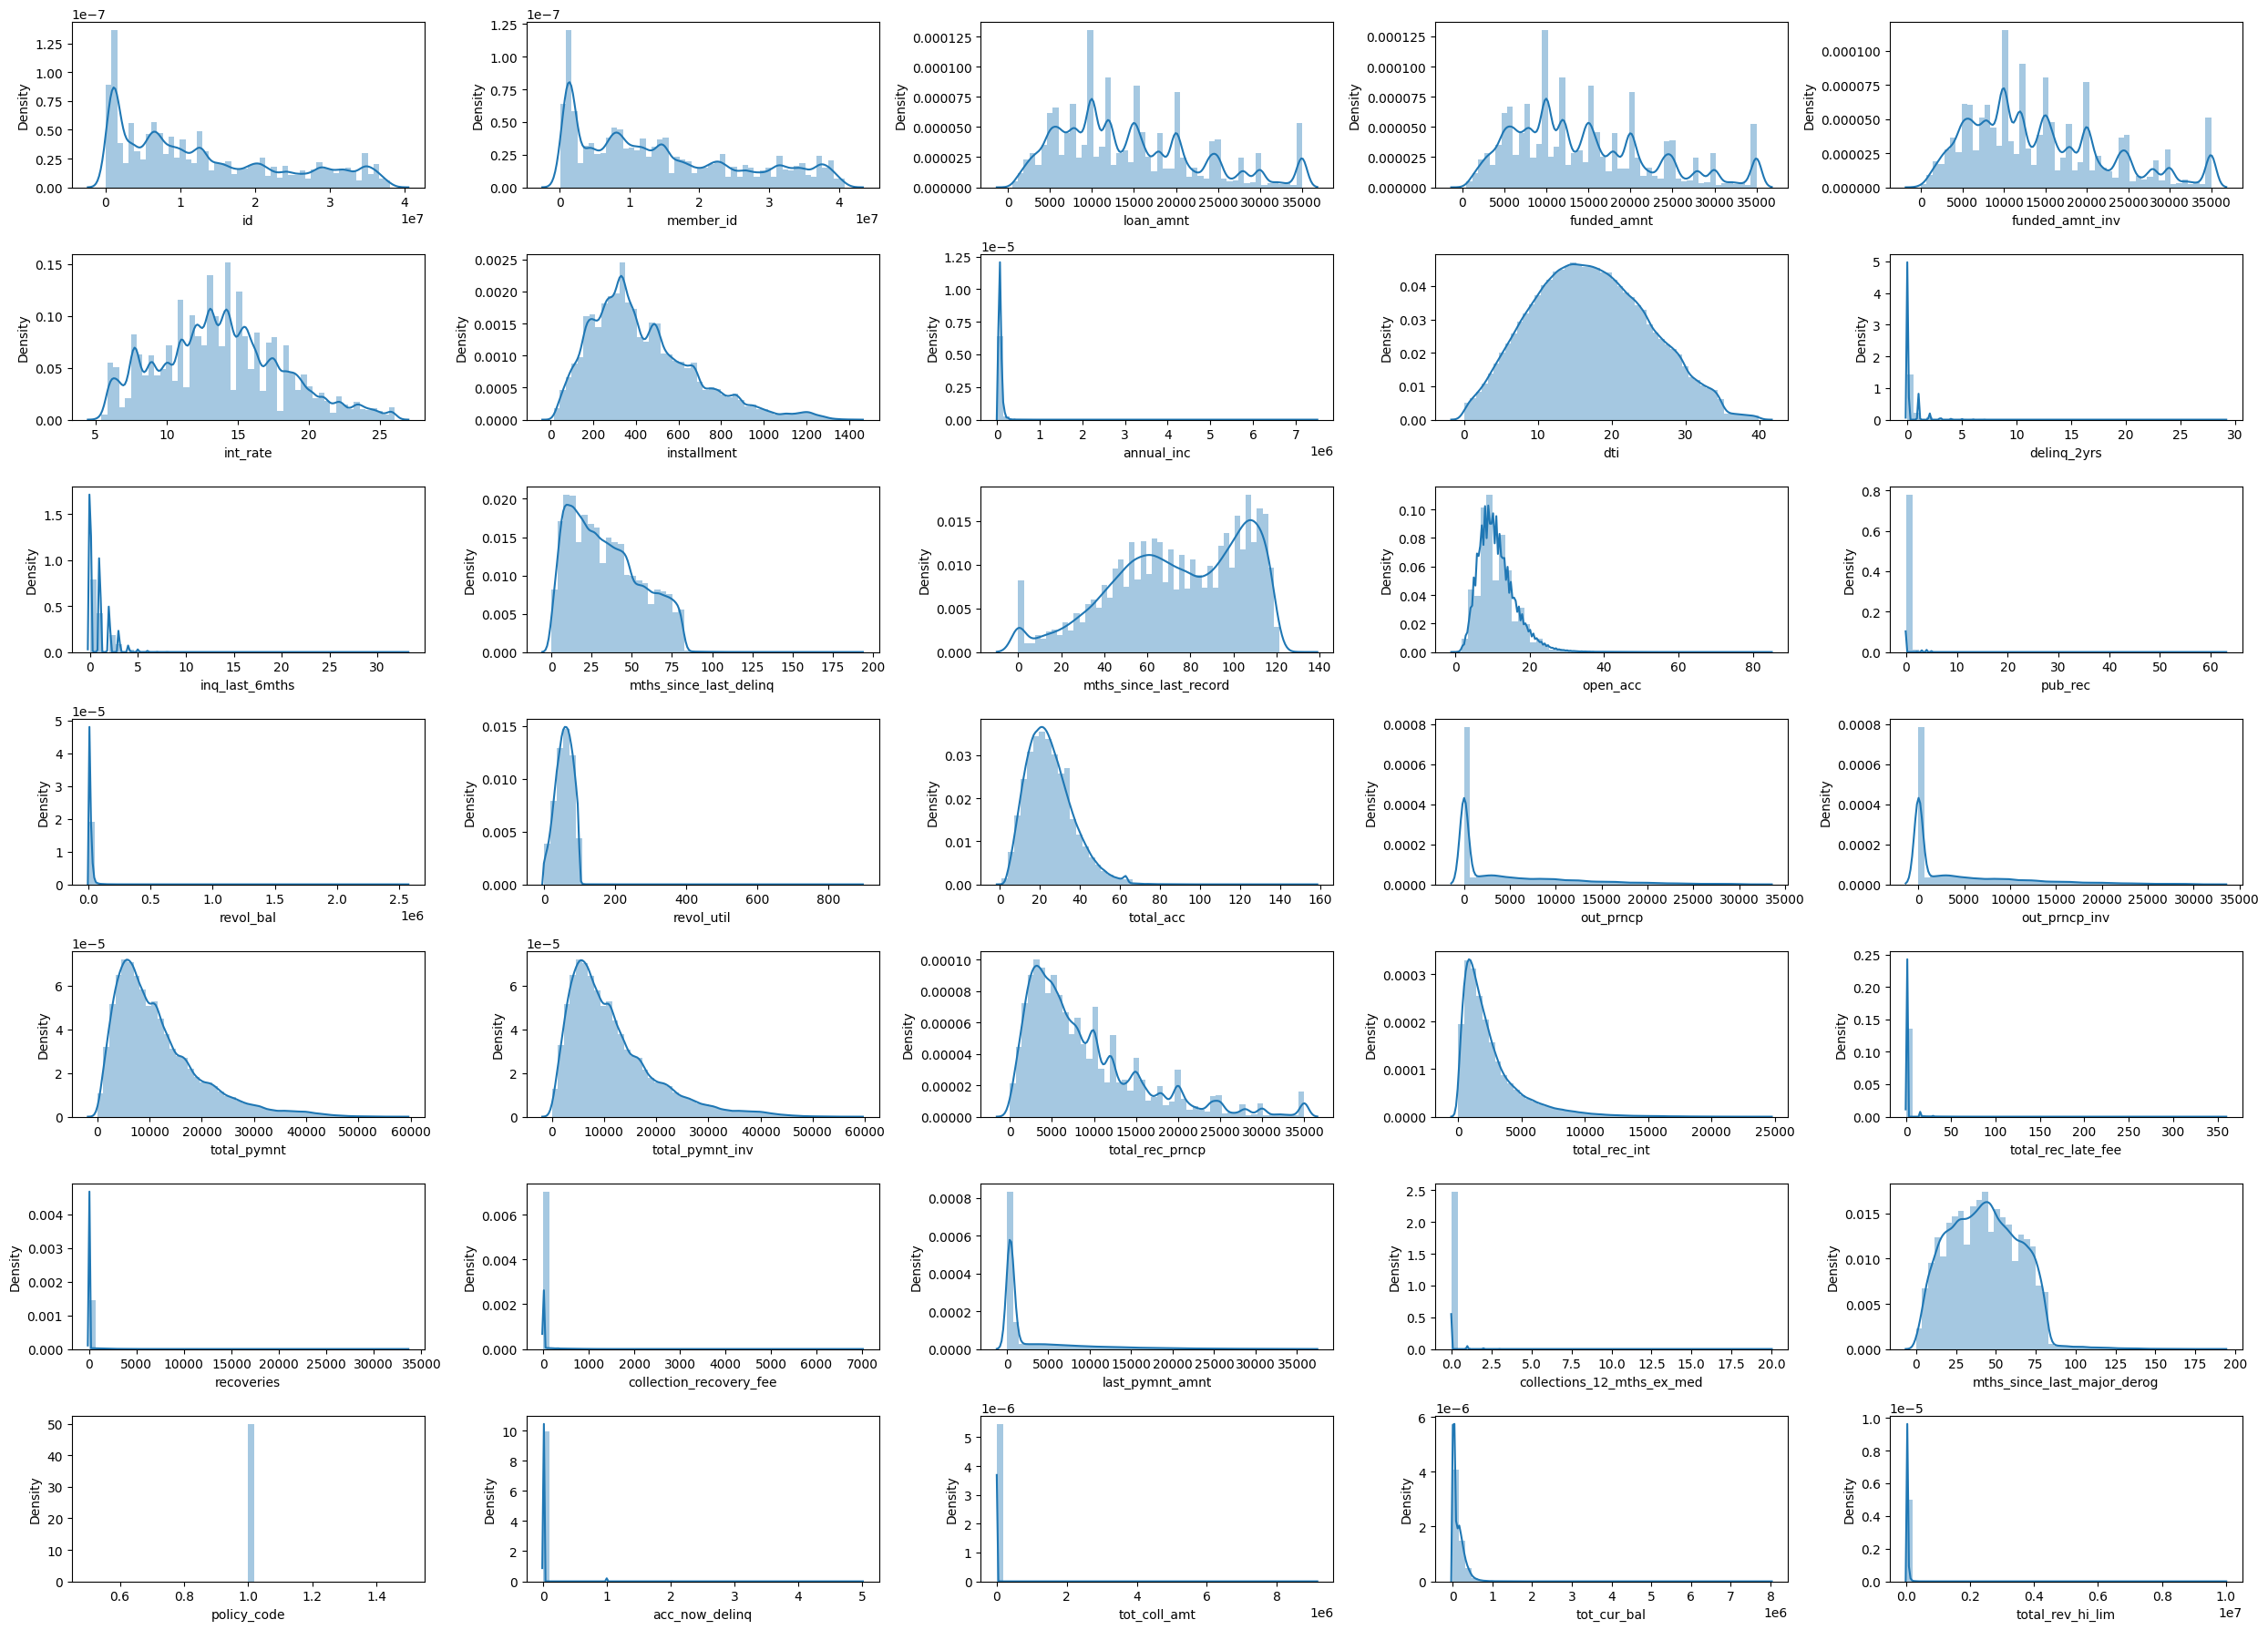

In [ ]:
plt.figure(figsize=(25,18))

for i, col in enumerate(nums,1):
    plt.subplot(7,5, i)
    sns.distplot(df[col],kde=True)

plt.tight_layout()

<Axes: >

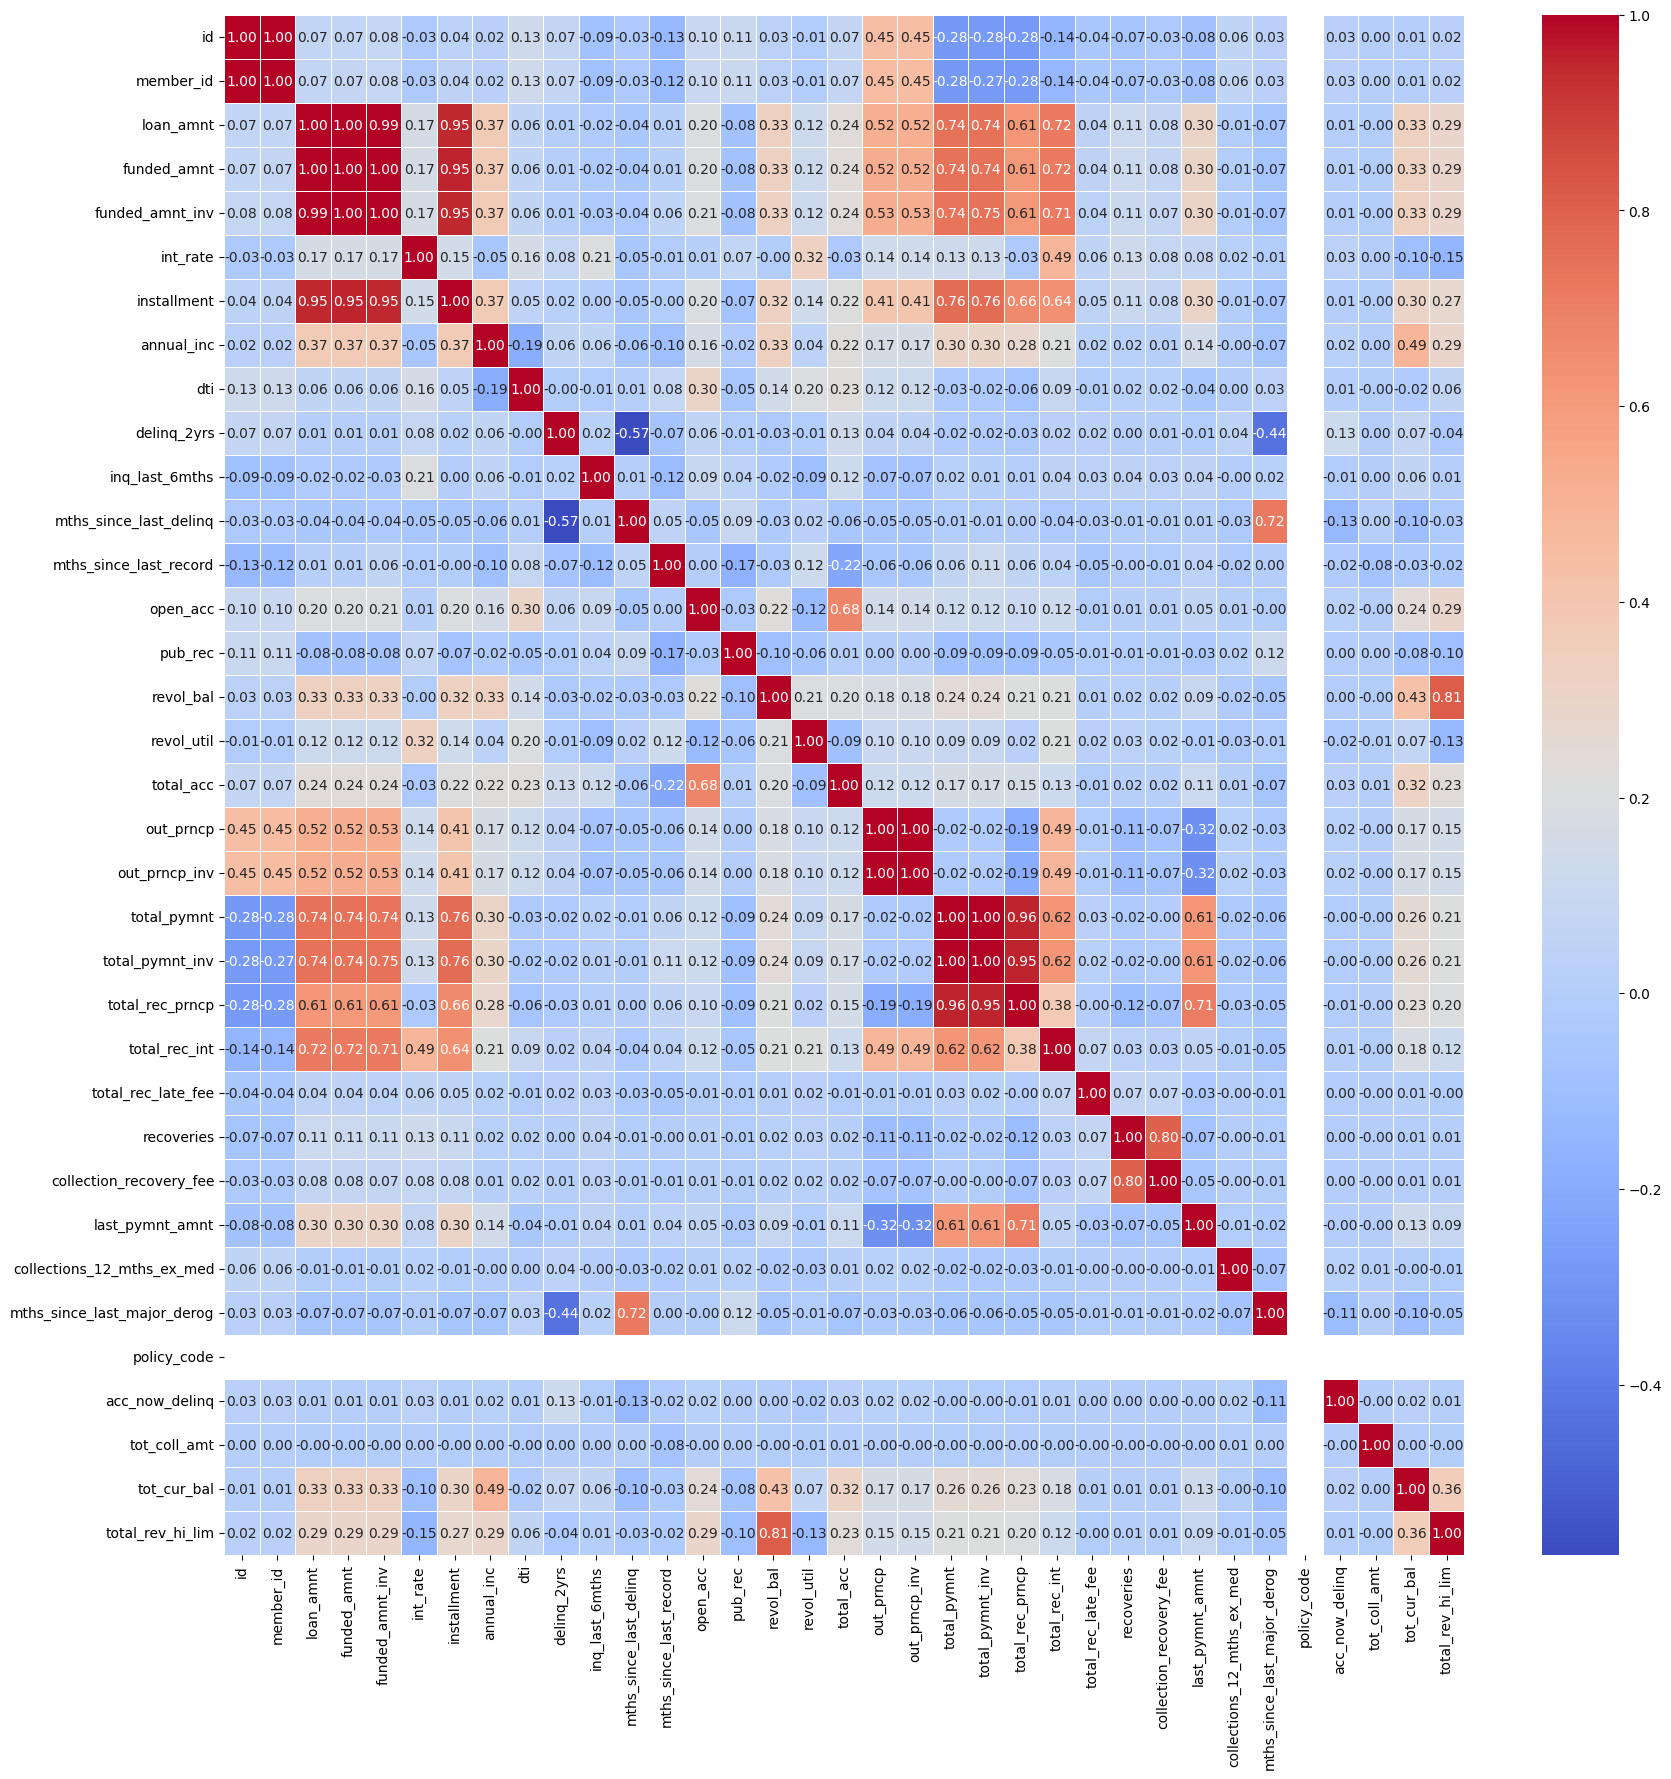

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df[nums].corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidth=0.5)

## Categorical Plot

In [ ]:
df[cats].nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
loan_status                 9
pymnt_plan                  2
purpose                    14
title                   63098
zip_code                  888
addr_state                 50
desc                   124435
url                    466285
initial_list_status         2
application_type            1
dtype: int64

Kolom "url" dan "desc" tidak akan ditampilkan dalam distribusi data karena keduanya cenderung memiliki nilai unik yang sangat banyak atau bersifat teks bebas yang sulit divisualisasikan

In [ ]:
# Filter columns with nunique less than or equal to 10
cats_to_plot1 = [col for col in df[cats].columns if df[col].nunique() <= 10 and col not in ['loan_status']]
cats_to_plot1

['term',
 'grade',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'initial_list_status',
 'application_type']

In [ ]:
# Filter columns with nunique greater than 10 and exclude 'url' and 'desc'
cats_to_plot2 = [col for col in df[cats].columns if df[col].nunique() > 10 and col not in ['url', 'desc','title']]
cats_to_plot2

['sub_grade', 'emp_title', 'emp_length', 'purpose', 'zip_code', 'addr_state']

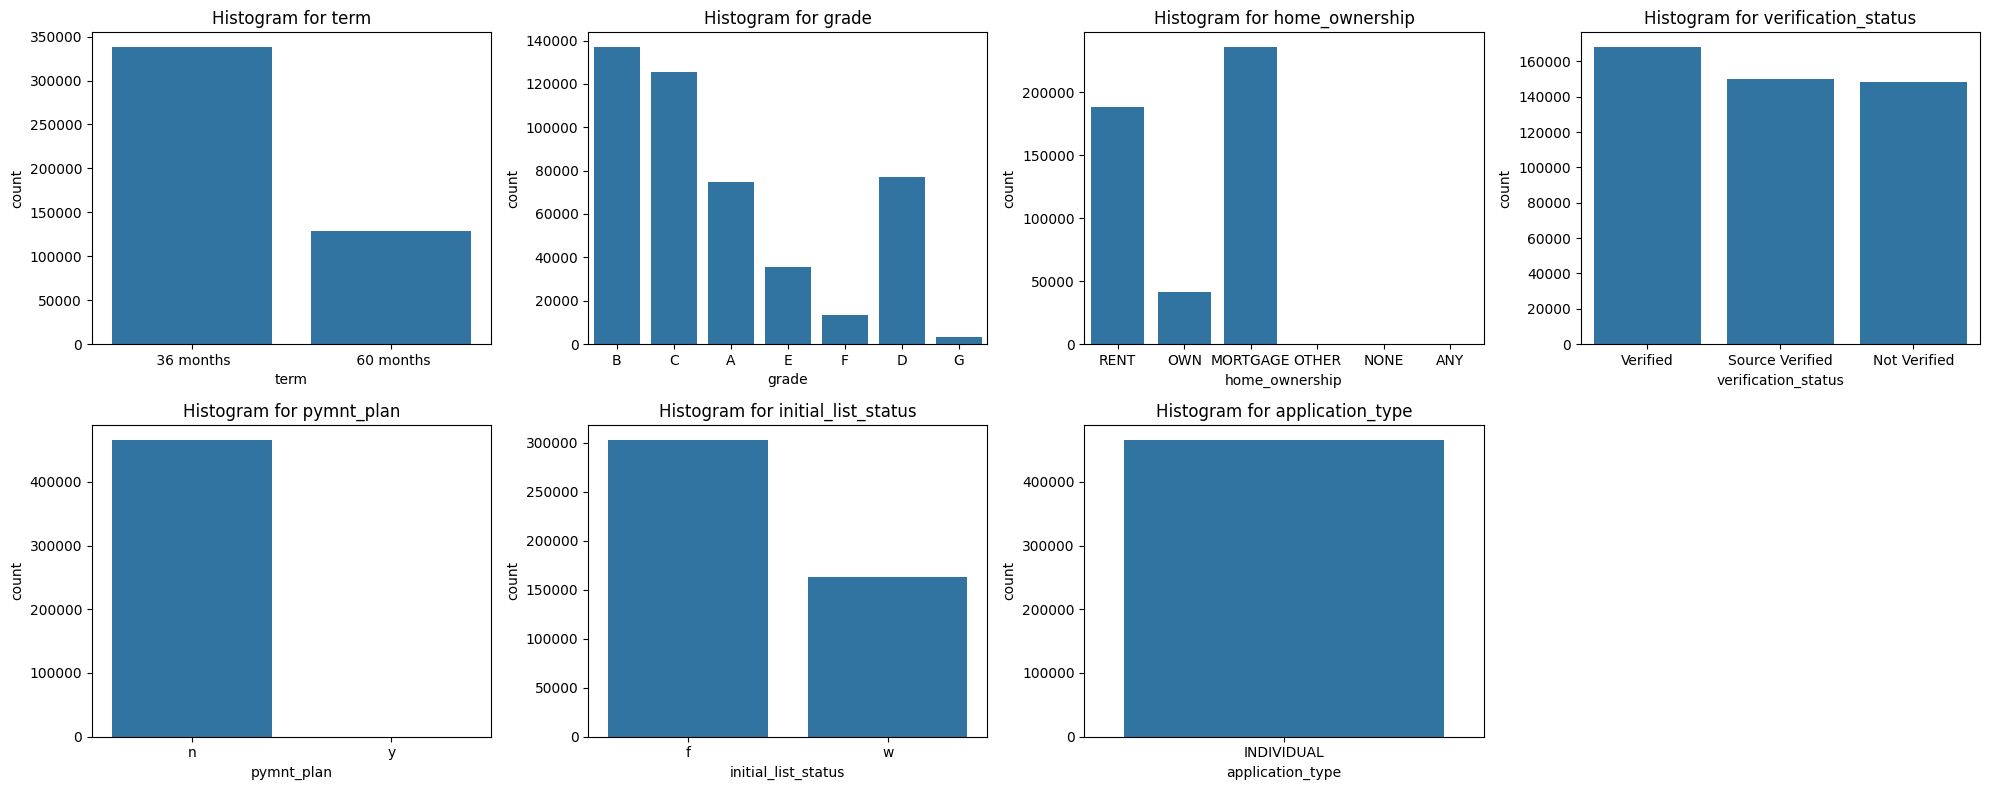

In [ ]:
plt.figure(figsize=(20,8))


for i, col in enumerate(cats_to_plot1, 1):
    plt.subplot(2,4, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Histogram for {col}')
    plt.xticks()
    plt.tight_layout()
plt.show()

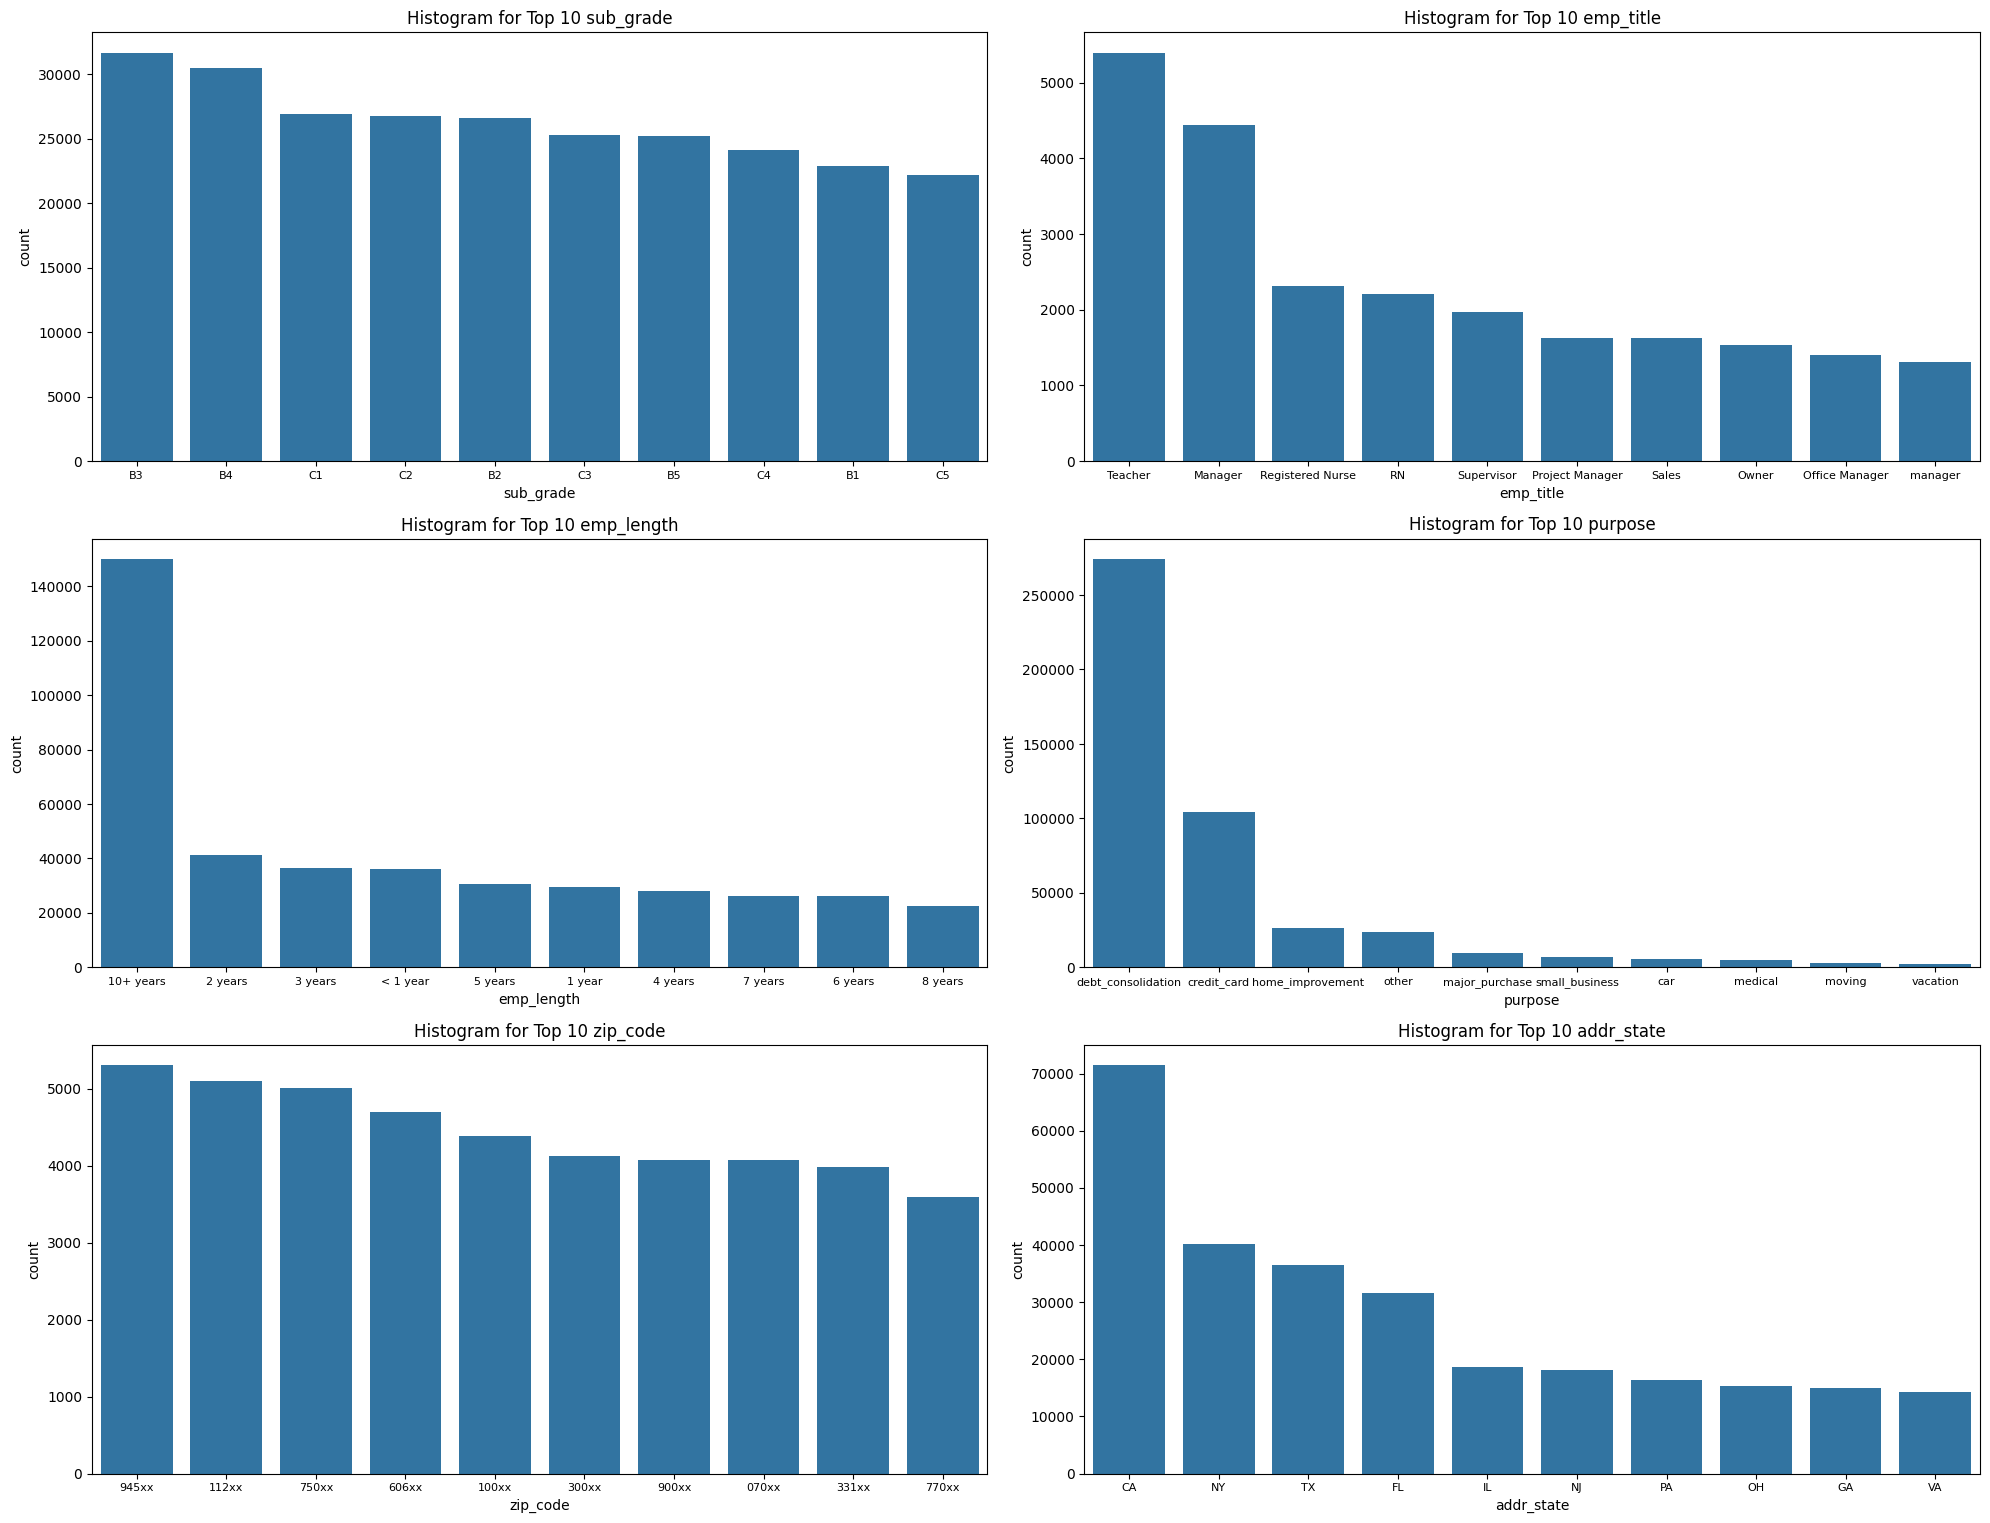

In [ ]:
plt.figure(figsize=(20,20))


for i, col in enumerate(cats_to_plot2, 1):
    plt.subplot(4, 2, i)
    top_values = df[col].value_counts().nlargest(10).index
    data_filtered = df[df[col].isin(top_values)]
    ax = sns.countplot(data=data_filtered, x=col, order=top_values)
    plt.title(f'Histogram for Top 10 {col}')
    plt.xticks(fontsize=8)
    plt.tight_layout()

plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


## Times Plot

In [ ]:
df[times].nunique()

issue_d                91
earliest_cr_line      664
last_pymnt_d           98
next_pymnt_d          100
last_credit_pull_d    103
dtype: int64

Karena nilai unik >10, maka untuk visualisasi hanya akan ditampilkan Top 10 saja

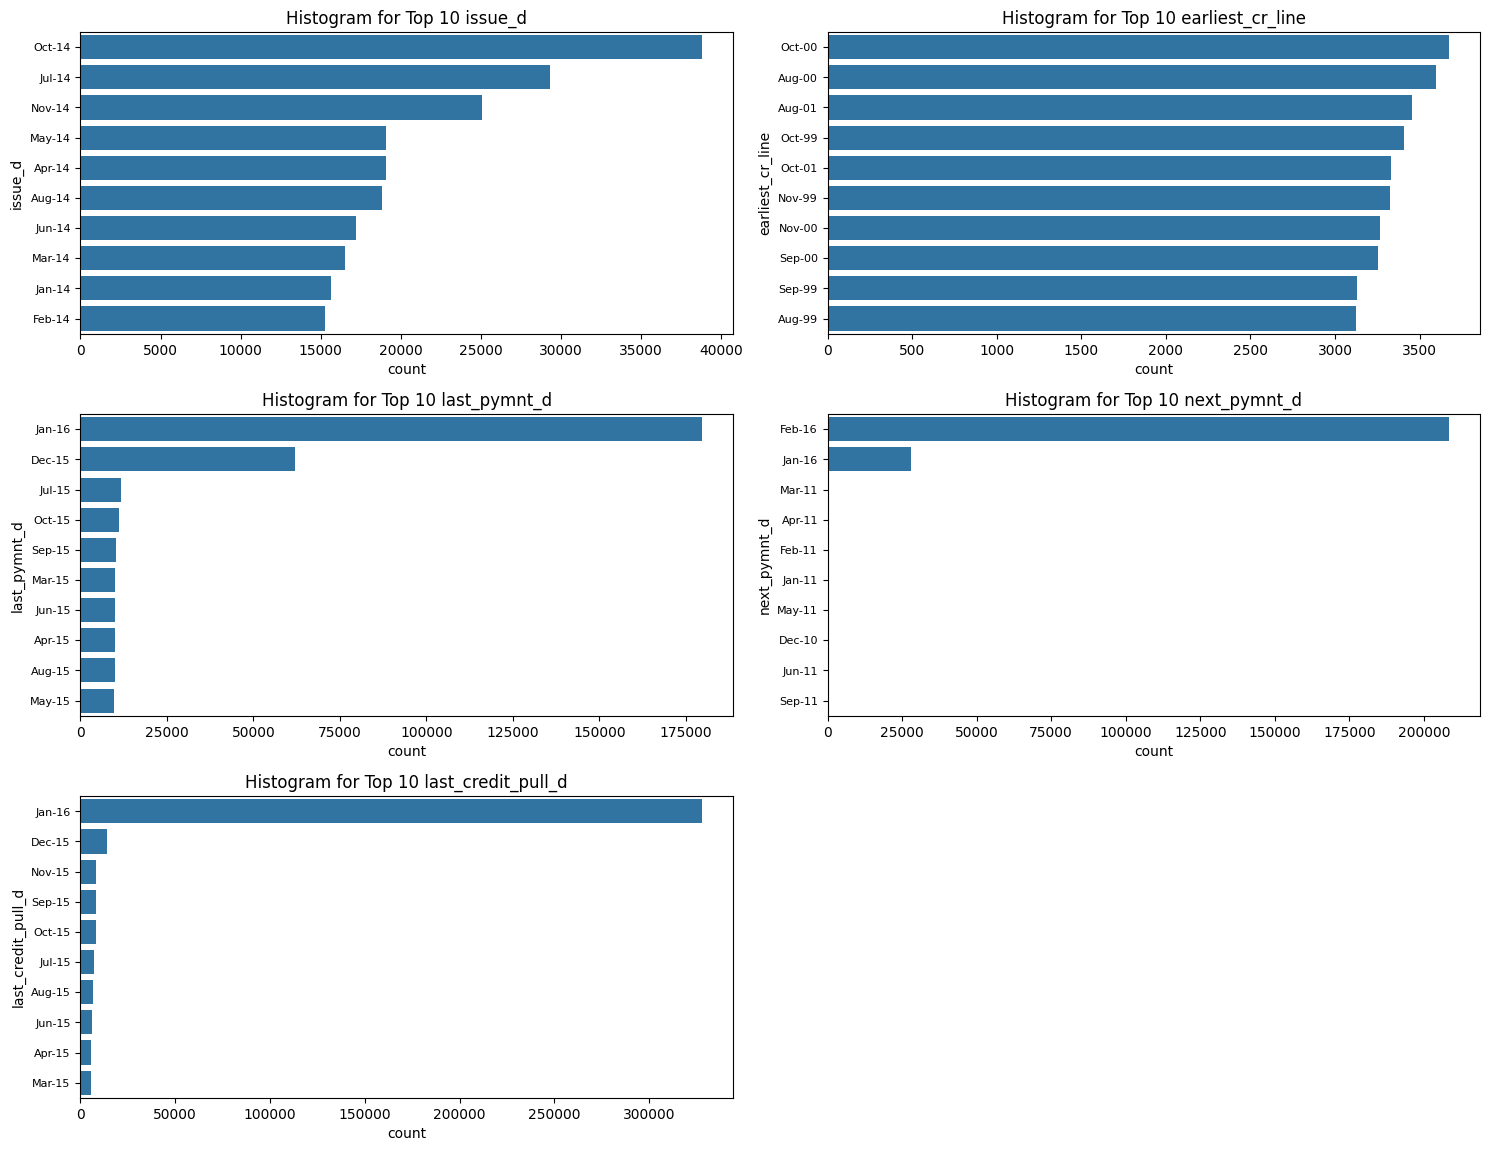

In [ ]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(times, 1):
    plt.subplot(4, 2, i)
    top_values = df[col].value_counts().nlargest(10).index
    data_filtered = df[df[col].isin(top_values)]
    ax = sns.countplot(data=data_filtered, y=col, order=top_values, orient='h')
    plt.title(f'Histogram for Top 10 {col}')
    plt.yticks(fontsize=8)
    plt.tight_layout()

plt.show()

# Target Analysis

In [ ]:
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

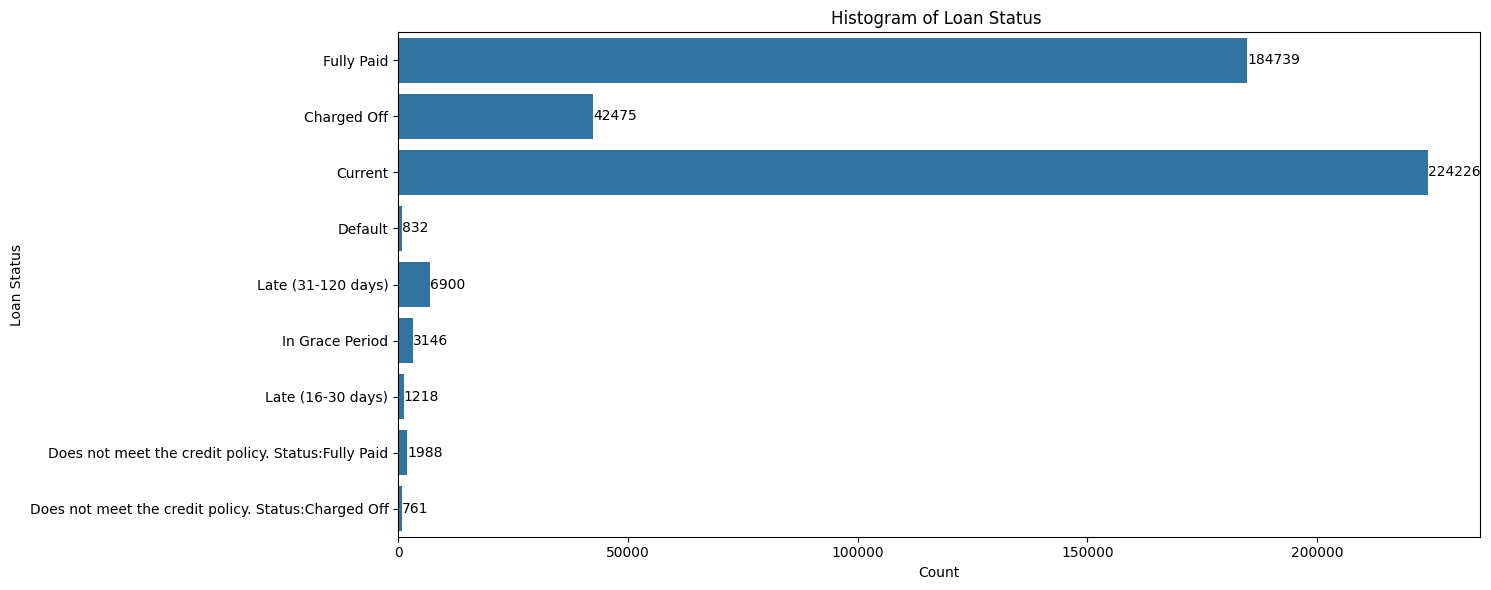

In [ ]:
plt.figure(figsize=(15,6))

ax = sns.countplot(data=df, y='loan_status', orient='h')
plt.title('Histogram of Loan Status ')
plt.xlabel('Count')
plt.ylabel('Loan Status')

# Add annotations
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width + 1,
        p.get_y() + p.get_height() / 2,
        '{:1.0f}'.format(width),
        ha='left',
        va='center')
plt.tight_layout()

In [ ]:
# good_loan = ['Current', 'Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid']
# bad_loan = ['Charged Off', 'Late (31-120 days)', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

# # Convert 'loan_status' to a and b
# df['target'] = df['loan_status'].apply(lambda x: 'good_loan' if x in good_loan else 'bad_loan')
# df.drop(columns=['loan_status'],inplace=True)
# df['target'].value_counts()

# Data Pre Processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [ ]:
missing_count = df.isna().sum()

In [ ]:
(missing_count / len(df)) * 100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       5.916553
emp_length                      4.505399
home_ownership                  0.000000
annual_inc                      0.000858
verification_status             0.000000
issue_d                         0.000000
loan_status                     0.000000
pymnt_plan                      0.000000
url                             0.000000
desc                           72.981975
purpose                         0.000000
title                           0.004504
zip_code                        0.000000
addr_state                      0.000000
dti             

## Handle Missing Values

**Missing Values Kolom Numerik**

In [ ]:
percent_missing_nums = df.select_dtypes(include=['float', 'int']).isna().sum() / len(df) * 100
percent_missing_nums

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
int_rate                        0.000000
installment                     0.000000
annual_inc                      0.000858
dti                             0.000000
delinq_2yrs                     0.006219
inq_last_6mths                  0.006219
mths_since_last_delinq         53.690554
mths_since_last_record         86.566585
open_acc                        0.006219
pub_rec                         0.006219
revol_bal                       0.000000
revol_util                      0.072917
total_acc                       0.006219
out_prncp                       0.000000
out_prncp_inv                   0.000000
total_pymnt                     0.000000
total_pymnt_inv                 0.000000
total_rec_prncp                 0.000000
total_rec_int                   0.000000
total_rec_late_f

In [ ]:
# Langkah 1: Drop baris dengan nilai kosong di bawah 10%
columns_to_dropna = percent_missing_nums[percent_missing_nums < 10].index.tolist()
df.dropna(subset=columns_to_dropna, inplace=True)

In [ ]:
# Langkah 2: Handle nilai kosong dengan mean untuk kolom dengan 10% hingga kurang dari 50%
columns_to_fill_mean = percent_missing_nums[(percent_missing_nums >= 10) & (percent_missing_nums < 50)].index.tolist()
df[columns_to_fill_mean] = df[columns_to_fill_mean].fillna(df[columns_to_fill_mean].mean())

In [ ]:
# Langkah 3: Hapus kolom jika nilai kosong 50% atau lebih
columns_to_drop_entirely = percent_missing_nums[percent_missing_nums >= 50].index.tolist()
df.drop(columns=columns_to_drop_entirely, inplace=True)

**Missing Values Kolom Katerorik**

In [ ]:
percent_missing_cats = df.select_dtypes(include=['object']).isna().sum() / len(df) * 100
percent_missing_cats

term                    0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.913076
emp_length              4.507204
home_ownership          0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
pymnt_plan              0.000000
url                     0.000000
desc                   73.004860
purpose                 0.000000
title                   0.004508
zip_code                0.000000
addr_state              0.000000
earliest_cr_line        0.000000
initial_list_status     0.000000
last_pymnt_d            0.079428
next_pymnt_d           48.724004
last_credit_pull_d      0.008587
application_type        0.000000
dtype: float64

In [ ]:
# Langkah 1: Drop baris dengan nilai kosong di bawah 10%
columns_to_dropna = percent_missing_cats[(percent_missing_cats > 0) & (percent_missing_cats < 10)].index.tolist()
df.dropna(subset=columns_to_dropna, inplace=True)

In [ ]:
# Langkah 2: Handle nilai kosong dengan mode untuk kolom dengan 10% hingga kurang dari 50%
columns_to_fill_mode = percent_missing_cats[(percent_missing_cats >= 10) & (percent_missing_cats < 50)].index.tolist()
for col in columns_to_fill_mode:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
# Langkah 3: Hapus kolom jika nilai kosong sekitar 50% atau lebih
df.drop(columns=df[['desc','next_pymnt_d']], inplace=True)

**Handle Missing Values Kolom Times**

In [ ]:
# df[times].isna().sum() / len(df) * 100

## Cek Duplikat

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['id'].duplicated().sum()

0

## Handle Outliers

In [ ]:
nums_2 = df.select_dtypes(include=['int', 'float']).columns
df[nums_2].columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

def handle_outliers(df, nums_2):
    for col in nums_2:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        low_limit = Q1 - (IQR * 1.5)
        high_limit = Q3 + (IQR * 1.5)

        filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit))
        df_prep = df[filtered_entries]

    return df_prep

df_prep = handle_outliers(df, nums_2)

print(f'Jumlah baris setelah memfilter outlier: {len(df_prep)}')

Jumlah baris sebelum memfilter outlier: 437709
Jumlah baris setelah memfilter outlier: 406863


# Feature Extraction

In [ ]:
df_prep.select_dtypes(include=['object']).head(3)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,Apr-99,f,Apr-13,Sep-13,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,Feb-96,f,Jan-15,Jan-15,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,Jan-96,f,Jan-16,Jan-16,INDIVIDUAL


Dalam fitur kategorikal, terdapat fitur dengan nilai unik yang merepresentasikan tanggal/waktu:

Issue_d: 89

Earliest_cr_line: 647

Last_pymnt_d: 98

Next_pymnt_d: 99

Last_credit_pull_d: 100

Fitur-fitur akan diubah menjadi fitur numerik yang merepresentasikan komponen tanggal seperti tahun, bulan, atau hari

In [ ]:
df_prep[['issue_d','earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']].sample(5)

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
61948,Nov-13,Sep-06,Jun-14,Jun-14
319852,Aug-14,Sep-98,Apr-15,Jan-16
164173,Feb-13,Mar-97,Dec-15,Jan-16
98800,Aug-13,Jan-03,Jan-16,Jan-16
387218,May-14,Feb-11,Jan-16,Jan-16


In [ ]:
df_prep['issue_d'] = pd.to_datetime(df_prep['issue_d'], format='%b-%y').dt.month
df_prep['earliest_cr_line'] = pd.to_datetime(df_prep['earliest_cr_line'], format='%b-%y').dt.month
df_prep['last_pymnt_d'] = pd.to_datetime(df_prep['last_pymnt_d'], format='%b-%y').dt.month
# df_prep['next_pymnt_d'] = pd.to_datetime(df_prep['next_pymnt_d'], format='%b-%y').dt.month
df_prep['last_credit_pull_d'] = pd.to_datetime(df_prep['last_credit_pull_d'], format='%b-%y').dt.month


df_prep[['issue_d','earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']].sample(5)

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
357684,7,10,9,10
257277,11,3,10,1
87334,9,9,6,6
376210,6,3,1,1
386579,5,4,8,9


In [ ]:
df_prep['home_ownership'].value_counts()

home_ownership
MORTGAGE    199860
RENT        172859
OWN          33929
OTHER          172
NONE            42
ANY              1
Name: count, dtype: int64

Dalam kolom di atas, dilakukan pengelompokkan untuk kolom **OTHER, NONE, ANY** menjadi **OTHER**

In [ ]:
# Menggabungkan kategori 'OTHER', 'NONE', dan 'ANY' menjadi 'OTHER'
df_prep['home_ownership'] = df_prep['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

# Memeriksa nilai unik dan jumlah kemunculan setelah pengelompokkan
df_prep['home_ownership'].value_counts()

home_ownership
MORTGAGE    199860
RENT        172859
OWN          33929
OTHER          215
Name: count, dtype: int64

In [ ]:
def categorize_emp_length(length):
    if length == '10+ years':
        return '10+ years'
    elif length == '< 1 year':
        return '< 1 year'
    else:
        return '1-9 years'

# Terapkan fungsi ke kolom emp_length
df_prep['emp_length'] = df_prep['emp_length'].apply(categorize_emp_length)
df_prep['emp_length'].value_counts()

emp_length
1-9 years    240317
10+ years    133010
< 1 year      33536
Name: count, dtype: int64

In [ ]:
df_prep['term'] = df_prep['term'].str.extract('(\d+)').astype(int)

Berdasarkan jumlah nilai unik (nunique) dari fitur-fitur kategorikal di atas, fitur dengan nilai unik yang sedikit (kecil atau sedang) yang akan dilakukan encoding

In [ ]:
# Definisikan kategori
debt = ['debt_consolidation', 'credit_card']
personal_needs = ['home_improvement', 'other', 'major_purchase', 'car', 'medical', 'moving', 'wedding', 'vacation']
investment = ['small_business', 'house', 'renewable_energy', 'educational']

In [ ]:
# Fungsi untuk mengelompokkan tujuan pinjaman
def kategorikan_tujuan(purpose):
    if purpose in debt:
        return 'debt'
    elif purpose in personal_needs:
        return 'personal_needs'
    elif purpose in investment:
        return 'investment'
    else:
        return 'other'

# Apply the categorization function to the purpose column
df_prep['purpose'] = df_prep['purpose'].apply(kategorikan_tujuan)

# Check the value counts in the purpose column after categorization
print(df_prep['purpose'].value_counts())

purpose
debt              330526
personal_needs     68161
investment          8176
Name: count, dtype: int64


Untuk menghitung pinjaman kredit, mengelompokkan tujuan pinjaman **'purpose'** dapat membantu dalam analisis risiko dan penentuan kebijakan. Pembagian menjadi 3 kelompok tersebut disesuaikan untuk dapat menghitung pinjaman kredit.

# Feature Encoding

In [ ]:
df_prep.select_dtypes(include=['object']).head(3)
# df_encode.select_dtypes(include=['object']).head(3)

,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,initial_list_status,application_type
1,C,C4,Ryder,< 1 year,RENT,Source Verified,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,personal_needs,bike,309xx,GA,f,INDIVIDUAL
3,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,personal_needs,personel,917xx,CA,f,INDIVIDUAL
4,B,B5,University Medical Group,1-9 years,RENT,Source Verified,Current,n,https://www.lendingclub.com/browse/loanDetail....,personal_needs,Personal,972xx,OR,f,INDIVIDUAL


In [ ]:
df_prep['loan_status'].value_counts()

loan_status
Current                                                191312
Fully Paid                                             165048
Charged Off                                             37282
Late (31-120 days)                                       6079
In Grace Period                                          2855
Does not meet the credit policy. Status:Fully Paid       1818
Late (16-30 days)                                        1058
Default                                                   734
Does not meet the credit policy. Status:Charged Off       677
Name: count, dtype: int64

In [ ]:
grade_mapping = {'A': 1, 'B': 2, 'C': 3,
                 'D': 4, 'E': 5, 'F': 6, 'G': 7}

#This pymnt_plan Indicates if a payment plan has been put in place for the loan (n/y)
pymnt_plan_mapping = {'n':0,
                     'y':1}

#The initial listing status of the loan. Possible values are – Whole, Fractional
initial_list_status_mapping = {'w' : 0,
                              'f' : 1}

# Define a dictionary for encoding loan_status variable -1 and 0 is a bad loan, and 1 is good loan
loan_status_mapping = {'Current' : 1,
                       'Fully Paid' : 1,
                       'Charged Off' : 0,
                       'Late (31-120 days)' : 0,
                       'In Grace Period' : 1,
                       'Does not meet the credit policy. Status:Fully Paid' : 1,
                       'Late (16-30 days)' : 0,
                       'Default' : 0,
                       'Does not meet the credit policy. Status:Charged Off' : 0}

In [ ]:
# Melakukan pemetaan menggunakan map
df_prep['grade'] = df_prep['grade'].map(grade_mapping)
df_prep['pymnt_plan'] = df_prep['pymnt_plan'].map(pymnt_plan_mapping)
df_prep['initial_list_status'] = df_prep['initial_list_status'].map(initial_list_status_mapping)
df_prep['loan_status'] = df_prep['loan_status'].map(loan_status_mapping)

In [ ]:
encode1 = pd.get_dummies(df_prep['home_ownership'], prefix = 'home_ownership')
encode2 = pd.get_dummies(df_prep['verification_status'], prefix = 'verification_status')
encode4 = pd.get_dummies(df_prep['application_type'], prefix = 'application_type')
encode5 = pd.get_dummies(df_prep['emp_length'], prefix = 'emp_length')
encode6 = pd.get_dummies(df_prep['purpose'], prefix = 'purpose')

In [ ]:
concat = pd.concat([df_prep, encode1, encode2, encode4,encode5,encode6], axis=1)
df_encode = concat.drop(columns=['home_ownership','verification_status','application_type','emp_length','purpose'])

df_encode.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,emp_length_1-9 years,emp_length_10+ years,emp_length_< 1 year,purpose_debt,purpose_investment,purpose_personal_needs
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,3,C4,...,False,True,False,True,False,False,True,False,False,True
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,3,C1,...,False,True,False,True,False,True,False,False,False,True
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,2,B5,...,False,True,False,True,True,False,False,False,False,True
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,1,A4,...,False,True,False,True,True,False,False,False,False,True
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,3,C5,...,True,False,False,True,True,False,False,True,False,False


In [ ]:
#Mengubah tipe boolean menjadi numeric

df_encode[df_encode.select_dtypes(include='bool').columns] = df_encode.select_dtypes(include='bool').astype(int)
df_encode.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,emp_length_1-9 years,emp_length_10+ years,emp_length_< 1 year,purpose_debt,purpose_investment,purpose_personal_needs
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,3,C4,...,0,1,0,1,0,0,1,0,0,1
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,3,C1,...,0,1,0,1,0,1,0,0,0,1
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,2,B5,...,0,1,0,1,1,0,0,0,0,1
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,1,A4,...,0,1,0,1,1,0,0,0,0,1
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,3,C5,...,1,0,0,1,1,0,0,1,0,0


In [ ]:
df_encode.select_dtypes(include='object').nunique()

sub_grade         35
emp_title     194516
url           406863
title          56939
zip_code         884
addr_state        50
dtype: int64

Untuk kolom kategorikal yang tersisa di atas akan dihapus dalam dataset karena memiliki terlalu banyak nilai unik atau tidak relevan untuk analisis dan pembuatan model prediksi. Hal tersebut dapat bersifat redundan atau mengurangi kompleksitas dan kebisingan data.

In [ ]:
df_encode.drop(columns=['sub_grade', 'emp_title', 'url', 'title', 'zip_code','addr_state'],inplace=True)
df_encode.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,...,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,emp_length_1-9 years,emp_length_10+ years,emp_length_< 1 year,purpose_debt,purpose_investment,purpose_personal_needs
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,3,30000.0,...,0,1,0,1,0,0,1,0,0,1
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,3,49200.0,...,0,1,0,1,0,1,0,0,0,1
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,2,80000.0,...,0,1,0,1,1,0,0,0,0,1


In [ ]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406863 entries, 1 to 466283
Data columns (total 55 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   id                                   406863 non-null  int64  
 1   member_id                            406863 non-null  int64  
 2   loan_amnt                            406863 non-null  int64  
 3   funded_amnt                          406863 non-null  int64  
 4   funded_amnt_inv                      406863 non-null  float64
 5   term                                 406863 non-null  int64  
 6   int_rate                             406863 non-null  float64
 7   installment                          406863 non-null  float64
 8   grade                                406863 non-null  int64  
 9   annual_inc                           406863 non-null  float64
 10  issue_d                              406863 non-null  int32  
 11  loan_status       

In [ ]:
df_encode.nunique()

id                                     406863
member_id                              406863
loan_amnt                                1342
funded_amnt                              1344
funded_amnt_inv                          9371
term                                        2
int_rate                                  503
installment                             52970
grade                                       7
annual_inc                              26581
issue_d                                    12
loan_status                                 2
pymnt_plan                                  2
dti                                      3997
delinq_2yrs                                24
earliest_cr_line                           12
inq_last_6mths                             27
open_acc                                   56
pub_rec                                    25
revol_bal                               45980
revol_util                               1259
total_acc                         

# Standardisasi & Normalisasi

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi kolom numerik menggunakan Min-Max Scaling
# scaler = MinMaxScaler()
# df_encode['loan_status'] = scaler.fit_transform(df_encode[['loan_status']])
df_nrm = pd.DataFrame(MinMaxScaler().fit_transform(df_encode), columns=df_encode.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_encode), columns=df_encode.columns)

df_std.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,...,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,emp_length_1-9 years,emp_length_10+ years,emp_length_< 1 year,purpose_debt,purpose_investment,purpose_personal_needs
count,4.068630e+05,4.068630e+05,4.068630e+05,4.068630e+05,4.068630e+05,4.068630e+05,4.068630e+05,4.068630e+05,4.068630e+05,4.068630e+05,...,4.068630e+05,4.068630e+05,4.068630e+05,406863.0,4.068630e+05,4.068630e+05,4.068630e+05,4.068630e+05,4.068630e+05,4.068630e+05
mean,-6.706150e-18,-7.656187e-17,1.179165e-16,1.313288e-17,2.302445e-16,5.993621e-17,-1.851177e-15,-4.272376e-16,1.473956e-17,-4.275170e-16,...,8.941533e-18,4.457668e-17,-1.005922e-17,0.0,1.179165e-16,-2.954897e-17,3.353075e-17,2.905998e-17,5.448746e-18,-1.955960e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,0.0,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.179490e+00,-1.225707e+00,-1.681981e+00,-1.681650e+00,-1.730565e+00,-6.190018e-01,-1.982583e+00,-1.731851e+00,-1.412909e+00,-1.360258e+00,...,-7.225756e-01,-6.943766e-01,-7.044650e-01,0.0,-1.201227e+00,-6.969207e-01,-2.997167e-01,-2.080824e+00,-1.432038e-01,-4.485998e-01
25%,-8.741089e-01,-8.762372e-01,-7.405965e-01,-7.385331e-01,-7.273326e-01,-6.190018e-01,-6.920930e-01,-7.122144e-01,-6.525702e-01,-5.090154e-01,...,-7.225756e-01,-6.943766e-01,-7.044650e-01,0.0,-1.201227e+00,-6.969207e-01,-2.997167e-01,4.805789e-01,-1.432038e-01,-4.485998e-01
50%,-2.757903e-01,-2.314735e-01,-2.385246e-01,-2.355375e-01,-2.257165e-01,-6.190018e-01,-6.885803e-02,-2.059065e-01,1.077691e-01,-1.930382e-01,...,-7.225756e-01,-6.943766e-01,-7.044650e-01,0.0,8.324820e-01,-6.969207e-01,-2.997167e-01,4.805789e-01,-1.432038e-01,-4.485998e-01
75%,6.999943e-01,7.170293e-01,6.401012e-01,6.447047e-01,6.364361e-01,1.615504e+00,6.308333e-01,5.383365e-01,8.681083e-01,2.809275e-01,...,1.383938e+00,1.440141e+00,1.419517e+00,0.0,8.324820e-01,1.434883e+00,-2.997167e-01,4.805789e-01,-1.432038e-01,-4.485998e-01
max,2.299113e+00,2.250713e+00,2.648389e+00,2.656687e+00,2.658576e+00,1.615504e+00,2.799413e+00,4.237162e+00,3.149126e+00,1.467166e+02,...,1.383938e+00,1.440141e+00,1.419517e+00,0.0,8.324820e-01,1.434883e+00,3.336484e+00,4.805789e-01,6.983057e+00,2.229158e+00


# Split Train-Test

In [ ]:
from sklearn.model_selection import train_test_split

X = df_nrm.drop(['id','member_id','loan_status'], axis=1)
y = df_nrm['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 325490 samples
Testing set size: 81373 samples


In [ ]:
print(y.dtype)
print(y.nunique())
print(df_nrm['loan_status'].value_counts())

float64
2
loan_status
1.0    361033
0.0     45830
Name: count, dtype: int64


In [ ]:
y_train.value_counts()

loan_status
1.0    288762
0.0     36728
Name: count, dtype: int64

# Model Selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score

In [ ]:
# Inisialisasi model
logreg_model = LogisticRegression(max_iter=1000)  # Menambahkan max_iter untuk mengatasi konvergensi
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

# Model Dictionary
models = {
    'Logistic Regression': logreg_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
}

# Train Model

In [ ]:
# Melatih model
logreg_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Prediksi dengan set pelatihan
y_train_pred_logreg = logreg_model.predict(X_train)
y_train_pred_dt = dt_model.predict(X_train)
y_train_pred_rf = rf_model.predict(X_train)

# Prediksi dengan set pengujian
y_pred_logreg = logreg_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

#Predict proba dengan set pelatihan
y_train_pred_proba_logreg = logreg_model.predict_proba(X_train)
y_train_pred_proba_dt = dt_model.predict_proba(X_train)
y_train_pred_proba_rf = rf_model.predict_proba(X_train)

#Predict proba dengan set pengujian
y_pred_proba_logreg = logreg_model.predict_proba(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)

## Model Evaluation

In [ ]:
# Evaluasi Model Logistic Regression
print("Logistic Regression:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_logreg))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_logreg[:, 1]))  # Menggunakan indeks 1 untuk positive class
print("F1 Score:", f1_score(y_test, y_pred_logreg, average='weighted'))
print(classification_report(y_test, y_pred_logreg))
print("===============================================")

# Evaluasi Model Decision Tree
print("\nDecision Tree:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_dt))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_dt))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_dt[:, 1]))  # Menggunakan indeks 1 untuk positive class
print("F1 Score:", f1_score(y_test, y_pred_dt, average='weighted'))
print(classification_report(y_test, y_pred_dt))

# Evaluasi Model Random Forest
print("\nRandom Forest:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba_rf[:, 1]))  # Menggunakan indeks 1 untuk positive class
print("F1 Score:", f1_score(y_test, y_pred_rf, average='weighted'))
print(classification_report(y_test, y_pred_rf))

Logistic Regression:
Training Accuracy: 0.9749301053795816
Testing Accuracy: 0.9751268848389515
AUC-ROC: 0.9821350898728696
F1 Score: 0.9738496772485489
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      9102
         1.0       0.97      1.00      0.99     72271

    accuracy                           0.98     81373
   macro avg       0.98      0.89      0.93     81373
weighted avg       0.98      0.98      0.97     81373


Decision Tree:
Training Accuracy: 1.0
Testing Accuracy: 0.9877600678357686
AUC-ROC: 0.9713106511280796
F1 Score: 0.9877857818267696
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      9102
         1.0       0.99      0.99      0.99     72271

    accuracy                           0.99     81373
   macro avg       0.97      0.97      0.97     81373
weighted avg       0.99      0.99      0.99     81373


Random Forest:
Training Accuracy: 0.9999969277089926
Testin

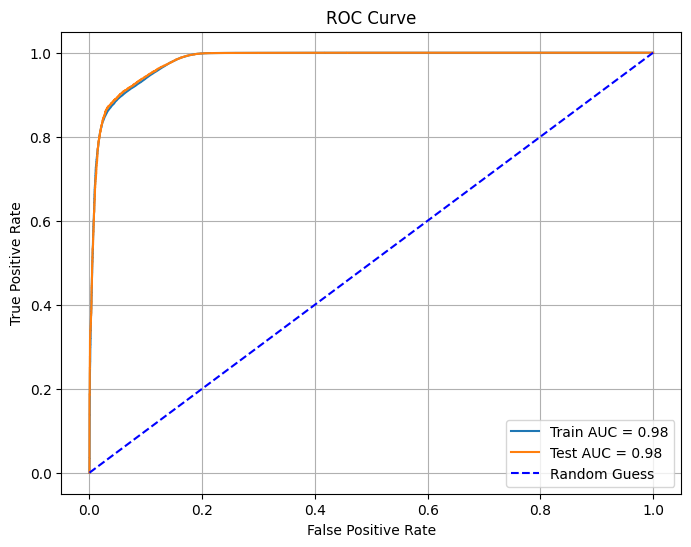

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict the probability score
prob_train = y_train_pred_proba_logreg[:, 1]
prob_test = y_pred_proba_logreg[:, 1]

# Create train and test curve
fpr_train, tpr_train, _ = roc_curve(y_train, prob_train)
fpr_test, tpr_test, _ = roc_curve(y_test, prob_test)

# Calculate AUC
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

# Create the straight line (how the graph looks like if the model does random guess instead)
random_probs = [0 for _ in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {roc_auc_train:.2f}')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {roc_auc_test:.2f}')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Pilih model yang akan di-tune
model_to_tune = models['Logistic Regression']

# Definisi hyperparameters
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=C)

# Inisialisasi RandomizedSearchCV
rs = RandomizedSearchCV(model_to_tune, hyperparameters, scoring='roc_auc', random_state=1, cv=5, n_iter=50)
rs.fit(X_train, y_train)

# Evaluasi model
y_pred = rs.predict(X_test)
y_pred_proba = rs.predict_proba(X_test)[:, 1]

print('Best Parameters:', rs.best_params_)
print('Classification Report:\n', classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))

Best Parameters: {'penalty': 'l2', 'C': 0.048487878787878795}
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.69      0.81      9102
         1.0       0.96      1.00      0.98     72271

    accuracy                           0.96     81373
   macro avg       0.98      0.84      0.90     81373
weighted avg       0.97      0.96      0.96     81373

ROC AUC Score: 0.9744694507389864


# Feature Importance

In [ ]:
dt_model.feature_importances_

array([1.82021122e-03, 1.43882997e-01, 8.41562499e-03, 1.32574734e-04,
       2.17221280e-03, 3.24789098e-03, 4.72021524e-04, 2.96754389e-03,
       1.93469498e-03, 9.79511109e-05, 3.32864053e-03, 5.58142531e-04,
       1.29166234e-03, 8.34163251e-04, 1.86019484e-03, 4.16143089e-04,
       3.81979174e-03, 3.01906195e-03, 1.89021866e-03, 1.94219558e-04,
       6.51762720e-02, 6.23587987e-02, 2.41528341e-03, 1.82990664e-03,
       1.14546467e-01, 4.42472376e-03, 1.19946998e-02, 4.40744283e-01,
       0.00000000e+00, 6.73130329e-02, 3.47201974e-02, 2.06200692e-03,
       1.44984176e-04, 0.00000000e+00, 2.72953562e-05, 1.29667154e-03,
       3.66494341e-03, 2.57870830e-03, 2.13808694e-04, 0.00000000e+00,
       2.09797803e-04, 2.75958318e-04, 2.36900375e-04, 3.47530507e-04,
       1.60599772e-04, 0.00000000e+00, 2.36168728e-04, 8.88098912e-05,
       2.53441559e-04, 1.70188983e-04, 2.53918906e-05, 1.27167777e-04])

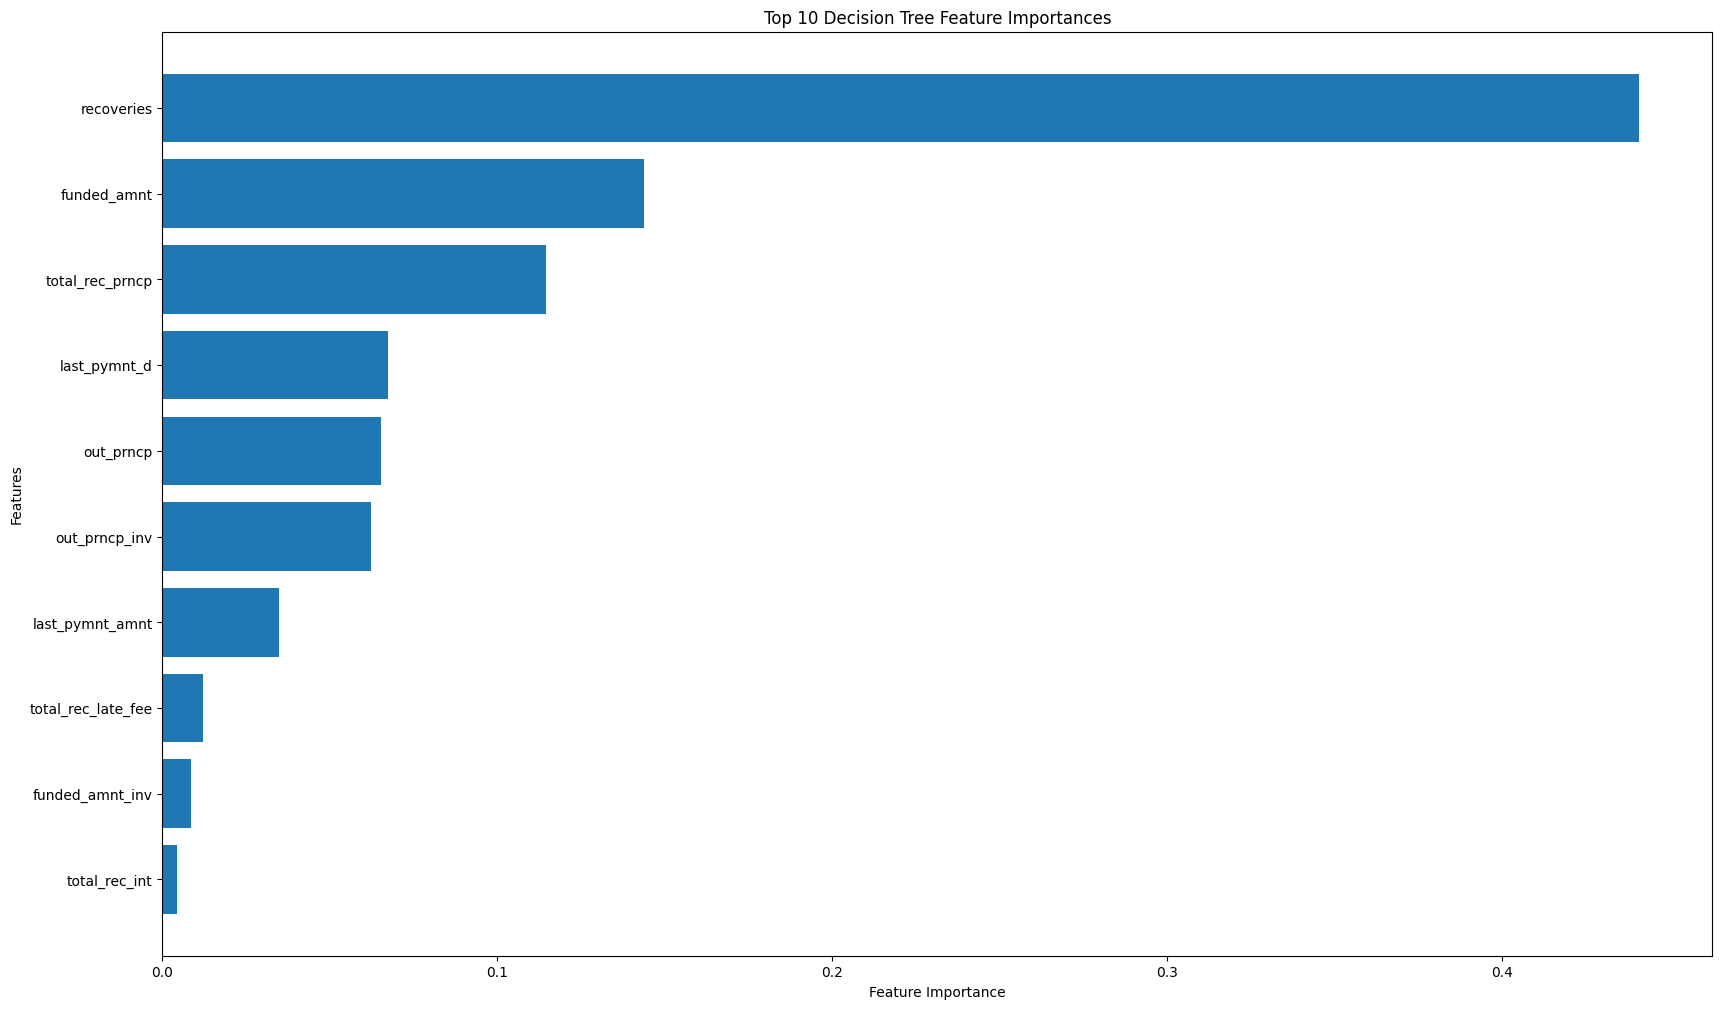

In [ ]:
# Mendapatkan feature importances dari model Decision Tree
importances = dt_model.feature_importances_

# Nama kolom fitur dari X_train jika tersedia
feature_names = X_train.columns

# Menggabungkan nama fitur dengan nilai importances
feature_importances = list(zip(feature_names, importances))
feature_importances.sort(key=lambda x: x[1], reverse=True)  # Urutkan berdasarkan nilai importances tertinggi

# Memisahkan nama fitur dan nilai importances
sorted_features = [f[0] for f in feature_importances]
sorted_importances = [f[1] for f in feature_importances]

# Plot feature importances
plt.figure(figsize=(20,12))
plt.barh(sorted_features[:10], sorted_importances[:10], align='center')  # 10 fitur teratas
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Decision Tree Feature Importances')
plt.gca().invert_yaxis()
plt.show()
